# Logistic Regression – Theory

## 1. Definition
Logistic Regression is a **supervised machine learning algorithm** used for **classification tasks**, typically binary classification (0 or 1).  
Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts the **probability of an instance belonging to a class**.

---

## 2. Key Idea
- Logistic Regression uses the **logistic (sigmoid) function** to map predicted values to probabilities between 0 and 1:  

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Where:

- \(z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n\)  
- \(\sigma(z)\) outputs a probability value for class 1.  

The predicted class is usually determined by a **threshold** (default 0.5):

\[
\text{Predicted class} =
\begin{cases}
1 & \text{if } \sigma(z) \geq 0.5 \\
0 & \text{if } \sigma(z) < 0.5
\end{cases}
\]

---

## 3. Applications
- Email spam detection (spam or not)  
- Disease prediction (positive or negative)  
- Customer churn prediction (yes/no)  
- Credit card fraud detection (fraud/not fraud)

---

## 4. Advantages
- Simple and efficient for binary classification.  
- Outputs probabilities, not just classes.  
- Can handle multiple features (multivariate logistic regression).  

---

## 5. Limitations
- Assumes a **linear relationship** between features and log-odds.  
- Not ideal for **non-linear decision boundaries**.  
- Sensitive to **outliers**.  

---

## 6. Model Training
- Logistic Regression is trained by **maximizing the likelihood** (Maximum Likelihood Estimation) instead of minimizing squared error.  
- For iterative training (like epochs), **SGDClassifier** with `loss='log'` can be used.


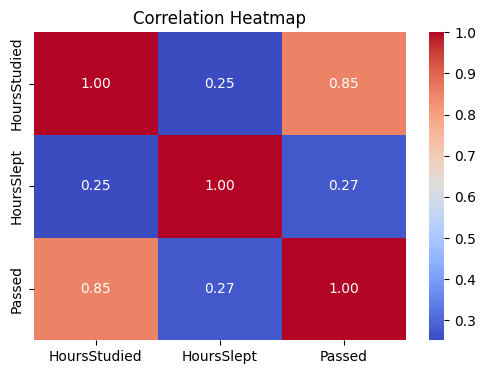

Epoch	Train Acc	Test Acc
1	1.00		1.00
2	1.00		1.00
3	1.00		1.00
4	1.00		1.00
5	1.00		1.00
6	1.00		1.00
7	1.00		1.00
8	1.00		1.00
9	1.00		1.00
10	1.00		1.00

Final Evaluation Metrics (Test Data)
Accuracy  : 1.00
Precision : 1.00
Recall    : 1.00
F1 Score  : 1.00


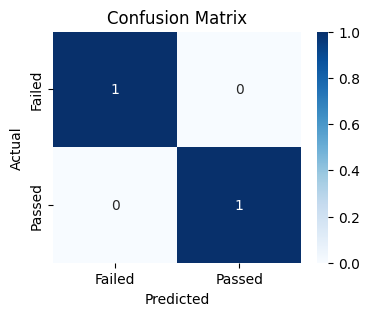

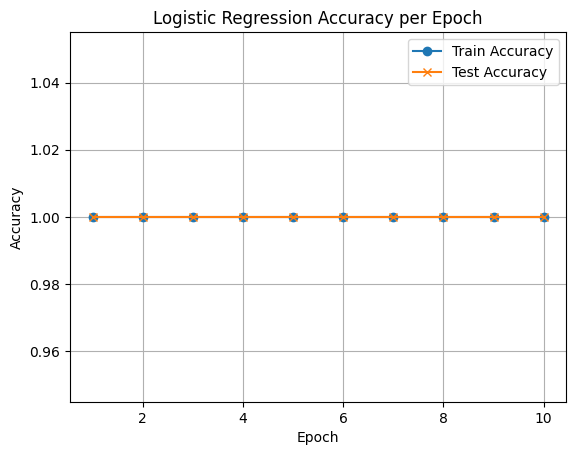

In [1]:
# ==============================
# Logistic Regression with Epoch Processing + Metrics (Corrected)
# ==============================

# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create Self-Contained Dataset
data = pd.DataFrame({
    'HoursStudied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'HoursSlept': [7, 6, 5, 6, 7, 5, 6, 7, 8, 6],
    'Passed': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

# ------------------------------
# CORRELATION HEATMAP (Optional - Demo Purpose)
# ------------------------------
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. Define features (X) and target (y)
X = data[['HoursStudied', 'HoursSlept']].values
y = data['Passed'].values

# 4. Train-test split (STRATIFIED - FIXES THE ERROR)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 5. Feature Scaling (IMPORTANT for SGD)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Define classes explicitly (required for partial_fit)
classes = np.array([0, 1])

# 7. Initialize Logistic Regression using SGD
sgd_log = SGDClassifier(
    loss='log_loss',
    max_iter=1,
    tol=None,
    eta0=0.1,
    learning_rate='constant',
    random_state=42
)

# 8. Train with explicit epochs
epochs = 10
train_acc_list = []
test_acc_list = []

print("Epoch\tTrain Acc\tTest Acc")
for epoch in range(1, epochs + 1):
    sgd_log.partial_fit(X_train, y_train, classes=classes)

    y_train_pred = sgd_log.predict(X_train)
    y_test_pred = sgd_log.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print(f"{epoch}\t{train_acc:.2f}\t\t{test_acc:.2f}")

# ------------------------------
# FINAL EVALUATION METRICS
# ------------------------------
y_test_pred = sgd_log.predict(X_test)

print("\nFinal Evaluation Metrics (Test Data)")
print(f"Accuracy  : {accuracy_score(y_test, y_test_pred):.2f}")
print(f"Precision : {precision_score(y_test, y_test_pred):.2f}")
print(f"Recall    : {recall_score(y_test, y_test_pred):.2f}")
print(f"F1 Score  : {f1_score(y_test, y_test_pred):.2f}")

# ------------------------------
# CONFUSION MATRIX
# ------------------------------
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Failed", "Passed"],
    yticklabels=["Failed", "Passed"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ------------------------------
# ACCURACY VS EPOCH PLOT
# ------------------------------
plt.plot(range(1, epochs + 1), train_acc_list, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs + 1), test_acc_list, label='Test Accuracy', marker='x')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy per Epoch")
plt.legend()
plt.grid(True)
plt.show()


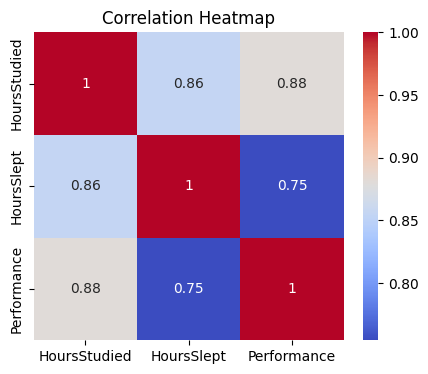

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: 

Accuracy : 0.75
Precision: 0.5
Recall   : 0.6666666666666666
F1 Score : 0.5555555555555555

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         2
      Medium       0.50      1.00      0.67         1
        High       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4



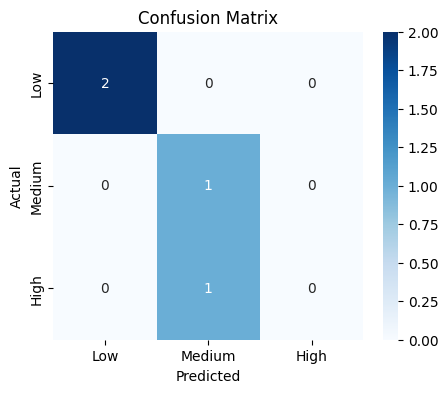


New Student Performance: Low


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [4]:
# ==============================
# MULTI-CLASS CLASSIFICATION (FIXED)
# ==============================

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# 2. Create a Multi-Class Dataset
# 0 = Low, 1 = Medium, 2 = High
data = pd.DataFrame({
    'HoursStudied': [1,2,3,4,5,6,7,8,9,10,11,12],
    'HoursSlept':  [5,6,5,6,6,7,7,8,8,9,7,8],
    'Performance': [0,0,0,0,0,0,0,1,1,2,2,2]
})

# 3. Correlation Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4. Features & Target
X = data[['HoursStudied', 'HoursSlept']]
y = data['Performance']

# 5. Train-Test Split (FIXED WITH STRATIFY)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
    stratify=y   # ✅ IMPORTANT FIX
)

# 6. Train Multi-Class Logistic Regression
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs'
)
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Evaluation Metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=["Low", "Medium", "High"]
))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 10. New Prediction
new_student = [[7, 8]]
labels = ["Low", "Medium", "High"]
prediction = model.predict(new_student)

print("\nNew Student Performance:", labels[prediction[0]])
